# ETF Volatility Analysis

### Import required Python libraries

In [31]:
import numpy as np
import seaborn as sb
import pandas as pd

### Define method to read data from .csv file

In [36]:
def read_data(ticker, dates):
    df = pd.DataFrame(index=dates)
    df_data = pd.read_csv('{}.csv'.format(ticker), index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'])  
    df_data = df_data.rename(columns={'Adj Close': ticker})
    df = df.join(df_data, how='inner')
    return df

### Normalize data by dividing by initial ETF price

In [37]:
def normalize_data(df):
    return df/df.iloc[0]

### Calculate daily returns of ETF
Set daily return of first data point to 0  <br/>
All other data points have daily return of price calculated by dividing array of all but first colum by array of all but last column

In [54]:
def calc_daily_returns(df):
    daily_returns = df.copy()
    daily_returns[1:] = 100 * ((df[1:]/ df[:-1].values) - 1)
    daily_returns.iloc[0] = 0
    return daily_returns

### Calculate returns of Vanguard Small Cap Index Fund (VB) vs Vanguard 500 Index Fund (VOO)
Calculate historical daily returns of past three year period

[Text(0.5, 0, 'Daily Returns %'),
 Text(0.5, 1.0, 'Histogram Showing Historical % Daily Returns Of VOO ETF vs VB ETF')]

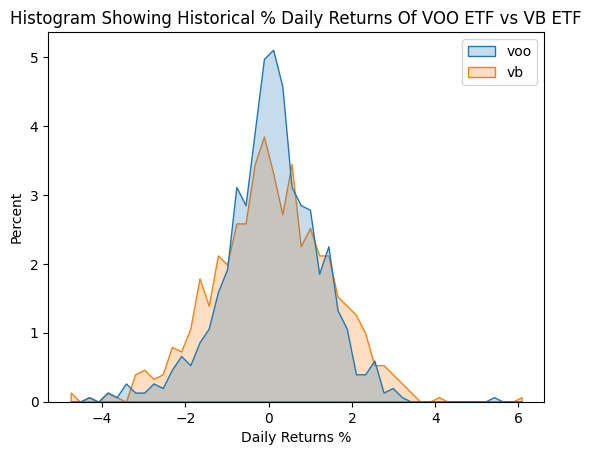

In [61]:
dates = pd.date_range('2020-06-13', '2023-06-13')
vb_price_data = read_data('vb', dates)
vb_price_data = normalize_data(vb_price_data)

vb_daily_returns = calc_daily_returns(vb_price_data)

voo_price_data = read_data('voo', dates)
voo_price_data = normalize_data(voo_price_data)
voo_daily_returns = calc_daily_returns(voo_price_data)

daily_returns = voo_daily_returns.join(vb_daily_returns, how='inner')

ax = sb.histplot(daily_returns, stat="percent", bins=50, element="poly")
ax.set(xlabel="Daily Returns %", title="Histogram Showing Historical % Daily Returns Of VOO ETF vs VB ETF")

The above plot shows that historical returns of VOO are less distribued than historical returns of VB. This suggests that historically investing in VOO has been less volatile than investing in VB over the same time period

### Calculating average daily return and volatility
The volatility of an asset can be calcuated as the standard deviation of returns multiplied by the square root of the number of time periods in the time horizon. Therefore, in this scenario that is standard deviation 

In [69]:
vb_mean_daily_return = vb_price_data['vb'].mean()
vb_no_time_periods = vb_price_data['vb'].count()
vb_std = vb_price_data['vb'].std()
vb_vol = vb_std * np.sqrt(vb_no_time_periods)
print("VB mean daily return is: {}, std is: {} and volatility is: {}".format(vb_mean_daily_return, vb_std, vb_vol))

voo_mean_daily_return = voo_price_data['voo'].mean()
voo_no_time_periods = voo_price_data['voo'].count()
voo_std = voo_price_data['voo'].std()
voo_vol = voo_std * np.sqrt(voo_no_time_periods)
print("VOO mean daily return is: {}, std is: {} and volatility is: {}".format(voo_mean_daily_return, voo_std, voo_vol))

VB mean daily return is: 1.3818378184613325, std is: 0.1633216932563077 and volatility is: 4.484660245551833
VOO mean daily return is: 1.3428097479496572, std is: 0.1388607342114863 and volatility is: 3.8129852928299885
